In [1]:
# add path to sispeuede to sys.path in python
import sys
import pathlib
import warnings
warnings.filterwarnings("ignore")


path_git = pathlib.Path("/Users/usuario/git")
for subdir in [
    "sisepuede", 
    "sisepuede_data_pipeline",
    "sisepuede_juypyter"
]:
    _PATH_CUR = path_git.joinpath(subdir)
    if str(_PATH_CUR) not in sys.path:
        sys.path.append(str(_PATH_CUR))

path_pipeline = path_git.joinpath("sisepuede_data_pipeline")


import importlib
import matplotlib.pyplot as plt
import numpy as np
import os, os.path
import pandas as pd
import sisepuede.core.attribute_table as att
import sisepuede.core.support_classes as sc
import sisepuede.legacy.data_api as api
import sisepuede.manager.sisepuede_examples as sxl
import sisepuede.manager.sisepuede_file_structure as sfs
import sisepuede.manager.sisepuede_models as sm
import sisepuede.utilities._plotting as spu
import sisepuede.utilities._toolbox as sf
import sisepuede.visualization.plots as svp


import time
from typing import *

# from sisepuede_data_pipeline
import lib.data_objects as do
import lib.process_utilities as pu
import lib.sisepuede_data_constructs as dc
import lib._util as lutil

# from sisepuede_jupyter
import temp_update_fields_from_wv_to_main as temp 


# Setup SISEPUEDE elements

In [4]:
def get_file_structure(
    y0: int = 2015,
    y1: int = 2070,
) -> Tuple[sfs.SISEPUEDEFileStructure, att.AttributeTable]:
    """Get the SISEPUEDE File Structure and update the attribute table
        with new years.
    """
    # setup some SISEPUEDE variables and update time period
    file_struct = sfs.SISEPUEDEFileStructure(
        initialize_directories = False,
    )

    # get some keys
    key_time_period = file_struct.model_attributes.dim_time_period
    key_year = file_struct.model_attributes.field_dim_year


    ##  BUILD THE ATTRIBUTE AND UPDATE

    # setup the new attribute table
    years = np.arange(y0, y1 + 1, ).astype(int)
    attribute_time_period = att.AttributeTable(
        pd.DataFrame(
            {
                key_time_period: range(len(years)),
                key_year: years,
            }
        ),
        key_time_period,
        
    )

    # finally, update the ModelAttributes inside the file structure
    (
        file_struct
        .model_attributes
        .update_dimensional_attribute_table(
            attribute_time_period,
        )
    )

    # return the tuple
    out = (file_struct, attribute_time_period, )

    return out

    
# set up some paths
_PATH_CUR = pathlib.Path(os.getcwd())
_PATH_DATA = _PATH_CUR.joinpath("data")
_PATH_OUTPUT = _PATH_DATA.joinpath("output")

# export prefix
_PREFIX_FILENAME_DATASETBUILD_BY_REGION = "sisepuede_raw_inputs_latest_"


# model attributes and associated support classes
_EXAMPLES = sxl.SISEPUEDEExamples()
_FILE_STRUCTURE, _ATTRIBUTE_TABLE_TIME_PERIOD = get_file_structure()
matt = _FILE_STRUCTURE.model_attributes
regions = sc.Regions(matt, )
time_periods = sc.TimePeriods(matt, )

# setup models
models = sm.SISEPUEDEModels(
    matt,
    allow_electricity_run = True,
    fp_julia = _FILE_STRUCTURE.dir_jl,
    fp_nemomod_reference_files = _FILE_STRUCTURE.dir_ref_nemo,
    initialize_julia = True, 
)

[juliapkg] Found dependencies: /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /Users/usuario/git/sisepuede/sisepuede/julia/pyjuliapkg/juliapkg.json
[juliapkg] Locating Julia =1.11.5, =1.11.6
[juliapkg] Using Julia 1.11.6 at /Users/usuario/.julia/juliaup/julia-1.11.6+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /Users/usuario/git/sisepuede/sisepuede/julia
[juliapkg] Writing Project.toml:
             [deps]
             PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
             OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
             Cbc = "9961bab8-2fa3-5c5a-9d89-47fab24efd76"
             Clp = "e2554f3b-3117-50c0-817c-e040a3ddf72d"
             DataFrames = "a93c6f00-e57d-5684-b7b6-d8193f3e46c0"
             GLPK = "60bf3e95-4087-53dc-ae20-288a0

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/git/sisepuede/sisepuede/julia/Project.toml`
  [9961bab8] + Cbc v1.3.0
  [e2554f3b] + Clp v1.3.0
  [a93c6f00] + DataFrames v1.8.1
  [60bf3e95] + GLPK v1.2.1
  [87dc4568] + HiGHS v1.20.1
  [b6b21f68] + Ipopt v1.13.0
  [4076af6c] + JuMP v1.29.3
  [a3c327a0] + NemoMod v2.2.0 `https://github.com/sei-international/NemoMod.jl.git#4a5a6fa`
⌅ [6099a3de] + PythonCall v0.9.25
  [0aa819cd] + SQLite v1.6.1
⌅ [458c3c95] + OpenSSL_jll v3.0.16+0
    Updating `~/git/sisepuede/sisepuede/julia/Manifest.toml`
  [6e4b80f9] + BenchmarkTools v1.6.3
  [9961bab8] + Cbc v1.3.0
  [e2554f3b] + Clp v1.3.0
  [523fee87] + CodecBzip2 v0.8.5
  [944b1d66] + CodecZlib v0.7.8
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.18.1
  [992eb4ea] + CondaPkg v0.2.33
  [88353bc9] + ConfParser v0.1.2
  [a8cc5b0e] + Crayons v4.1.1
  [a10d1c49] + DBInterface v2.6.1
  [9a962f9c] + DataAPI v1.16.0
  [a93c6f

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod...
Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
   1610.3 ms  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72] 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
┌ Info: Skipping precompilation due to precompilable error. Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
└   exception = Error when precompiling module, potentially caused by a __precompile__(false) declaration in the module.


In [5]:
def build_path_for_region_file(
    iso: str,
) -> pathlib.Path:
    """Build the output path for a file
    """
    fn = f"{_PREFIX_FILENAME_DATASETBUILD_BY_REGION}{iso}.csv"
    path_out = _PATH_OUTPUT.joinpath(fn)
    
    return path_out




In [139]:
##  SOME GLOBALS

df_example_input = _EXAMPLES("input_data_frame")
tab = regions.attributes.table


##  NOTE! Need to ignore these for the moment
# The GDP for these are incomplete:
#   - antigua_and_barbuda
#   - cayman_islands
# There are other issues with these countries:
#   - british_virgin_islands
#   - cuba
#   - curacao
#   - dominica
#   - grenada'
#   - saint_kitts_and_nevis
#   - saint_martin
#   - sint_maarten
#   - turks_and_caicos_islands
#   - united_states_virgin_islands
#
_REGIONS_TO_CHECK = [
    "antigua_and_barbuda", 
    "british_virgin_islands",
    "cayman_islands",
    "cuba",
    "curacao",
    "dominica",
    "grenada",
    "saint_kitts_and_nevis",
    "saint_martin",
    "sint_maarten",
    "turks_and_caicos_islands",
    "united_states_virgin_islands"
]

_REGIONS_BUILD = list(
    tab[
        tab["un_sub_region"].isin(["Latin America and the Caribbean"])
        & ~tab[regions.key].isin(_REGIONS_TO_CHECK)    
    ][regions.key]
    .unique()
)
_REGIONS_BUILD = sorted(
    _REGIONS_BUILD +
    [
        "bulgaria",
        "egypt",
        "libya",
        "morocco",
        "united_republic_of_tanzania"
    ]
)

_REGIONS_BUILD += ["china", "sri_lanka", "united_states_of_america"]
_REGIONS_ISO = [
    regions.return_region_or_iso(x, return_type = "iso", )
    for x in _REGIONS_BUILD
]


# Setup old repository and read data

In [172]:
repo_old = api.SISEPUEDEBatchDataRepository(
    "/Users/usuario/git/sisepuede_data", 
    matt,
)

print("Getting old repository data...")
df_old = repo_old.read(None)

print("Old repository data complete.")





Getting old repository data...
Old repository data complete.


# Setup new repository

In [140]:
importlib.reload(dc.sc)
importlib.reload(dc.sfs.ma)
importlib.reload(dc.sfs)
importlib.reload(dc)
construct = dc.SISEPUEDEDataConstructs(
    path_output_database = "/Users/usuario/git/sisepuede_data_pipeline/sisepuede_inputs.sqlite",
)

path_repo = pathlib.Path("/Users/usuario/SISEPUEDE_DATA_REPOSITORY")
repo = pu.Repository(
    {
        "local": {
            "path": str(path_repo)
        }
    }
)

# get from pipeline
df_from_pipeline = construct.build_inputs_from_database(
    regions_keep = _REGIONS_BUILD,
    join = "outer"
)


In [10]:
?construct.read_from_output_database(
    "GDP",
    "historical",
)



Signature:
construct.read_from_output_database(
    modvar: Union[str, sisepuede.core.model_variable.ModelVariable],
    table_type: str,
    bound_type: str = 'nominal',
    engine: Union[str, pathlib.Path, <module 'sqlalchemy.engine' from '/opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sqlalchemy/engine/__init__.py'>, NoneType] = None,
    **kwargs,
) -> Optional[pandas.core.frame.DataFrame]
Docstring:
Read a historical or projected data frame from the IterativeDatabase
    using the model variable and the table type.


Function Arguments
------------------
modvar : Union[str, mv.ModelVariable]
    ModelVariable (name or ModelVariable object) to write data for
table_type : str
    "historical" or "projected"

Keyword Arguments
-----------------
bound_type : str
    "max", "min", or "nominal" (any valid VariableBoundsReturnTypes)
engine : Union[str, pathlib.Path, sqlalchemy.engine, None]
    Optional engine to specify. Allows for attempts to read from another
 

In [45]:
?construct.build_inputs_from_database

Signature:
construct.build_inputs_from_database(
    bound_type: Optional[str] = None,
    engine: Union[str, pathlib.Path, <module 'sqlalchemy.engine' from '/opt/miniconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/sqlalchemy/engine/__init__.py'>, NoneType] = None,
    join: str = 'inner',
    modvars: Optional[List[Union[str, ForwardRef('ModelVariable')]]] = None,
    regions_keep: Union[int, str, List[int], List[str], NoneType] = None,
    table_type: Union[str, ForwardRef('TableType'), NoneType] = None,
    **kwargs,
) -> bool
Docstring:
Copy data from an existing database into the SISEPUEDEDataConstructs
    database. Runs across all input modvars in SISEPUEDE to evaluate 
    which tables can be copied.


Function Arguments
------------------
db_existing : Union[str, pathlib.Path, sqlalchemy.engine]
    sqlalchemy engine or path to sqlite database to copy from. 

Keyword Arguments
-----------------
bound_type : Union[str, None]
    Optional bound type to specify. If 

In [47]:
df = construct.build_inputs_from_database(
    modvars = ["Crop Yield Factor"],
    regions_keep = "BLZ"
)

df[df["year"].isin(range(2015, 2026))]

,iso_alpha_3,year,yf_agrc_bevs_and_spices_tonne_ha,yf_agrc_cereals_tonne_ha,yf_agrc_fibers_tonne_ha,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
54,BLZ,2015,0.213607,2.736992,1.408799,13.200116,4.049665,1.210013,0.804014,5.311918,1.117065,4.242200,39.591300,11.977269,10.830485
55,BLZ,2016,0.512452,2.950602,1.408799,11.092967,4.049665,1.075200,1.082384,5.311918,1.014944,4.775200,43.528500,10.983528,12.940591
56,BLZ,2017,0.691254,4.147740,1.408799,11.762482,4.049665,0.992100,1.109337,5.311918,1.025708,4.720800,44.847400,11.643495,11.571205
57,BLZ,2018,0.618517,3.934562,1.408799,9.896877,4.049665,1.333300,1.098798,5.311918,0.978061,4.920900,42.521900,10.964281,10.868471
58,BLZ,2019,0.562498,2.690488,1.408799,9.602098,4.049665,0.894700,0.669983,5.311918,1.538481,5.750900,44.312300,11.343646,9.317892
59,BLZ,2020,0.501381,3.419072,1.408799,10.104563,4.049665,0.947000,0.789766,5.311918,1.210316,4.525200,38.460100,9.960807,9.599162
60,BLZ,2021,0.405672,4.164562,1.408799,11.961348,4.049665,0.831500,0.911704,5.311918,0.981113,5.669400,45.254200,10.382851,10.746693
61,BLZ,2022,0.350650,4.397263,1.408799,11.685459,4.049665,0.956500,1.141626,5.311918,1.143552,5.287000,43.636700,8.404925,10.959252
62,BLZ,2023,0.589510,4.182173,1.408799,9.588886,4.049665,0.784599,0.972061,5.311918,1.242854,5.462576,42.780715,8.087128,10.526675
63,BLZ,2024,0.589510,4.182173,1.408799,9.588886,4.049665,0.784599,0.972061,5.311918,1.242854,5.462576,42.780715,8.087128,10.526675


In [34]:
df_gdp = construct.build_inputs_from_database(
    modvars = ["GDP"],
)


modvar_pop = matt.get_variable("Population")
df_pop = (
    modvar_pop.get_from_dataframe(
        df_old,
        fields_additional = ["iso_code3", "year"],
    )
    .dropna()
    .rename(columns = {"iso_code3": regions.field_iso, })
)

df_pop[time_periods.field_year] = (
    df_pop[time_periods.field_year].astype(int)
)


path_out = pathlib.Path("/Users/usuario/git/sisepuede_region_nbs/generic_regions/data/output")

df_out = pd.merge(
    df_pop,
    df_gdp,
    how = "outer",
)


sf._write_csv(
    df_out,
    path_out.joinpath("sisepuede_gdp_pop.csv")
)


True

In [ ]:
"Initial National Occupancy Rate"

In [181]:

def function_combine(
    df_repo_new: pd.DataFrame,
    df_repo_old: pd.DataFrame,
    df_example: pd.DataFrame,
    region_iso: str,
    dropnas_from_old: bool = True,
    years: Union[List[int], None] = None,
) -> pd.DataFrame:
    """Combine DataFrames by region, combining in a hierarchy
    """
    
    ##  FORMAT A BASE 

    # start by setting years
    if not sf.islistlike(years):
        years = time_periods.all_years

    
    df_base = (
        df_repo_old[
            df_repo_old[repo_old.field_repo_iso].isin([region_iso])
            & (df_repo_old[time_periods.field_year] >= min(years))
        ]
        .copy()
        .rename(
            columns = {
                repo_old.field_repo_iso: regions.field_iso,
                repo_old.field_repo_year: time_periods.field_year,
            }
        )
    )

    # QUICK FIX!
    #if "pop_lvst_initial_chickens" in df_base.columns:
    #    df_base["pop_lvst_initial_chickens"] *= 1000
    #    print("NOTE! Adjusting poultry population")

    # quick drop
    if dropnas_from_old:
        cols_drop = [
            x for x in df_base.columns 
            if df_base[x].dropna().shape[0] == 0
        ]
        df_base = df_base.drop(columns = cols_drop, )
        
    
    df_base[time_periods.field_year] = df_base[time_periods.field_year].astype(int)    
    df_base = (
        pd.merge(
            pd.DataFrame({time_periods.field_year: years, }),
            df_base,
            how = "left",
        )
        .ffill()
        .bfill()
    )


    ##  ADD IN PIPELINE DATA

    df_out = sf.match_df_to_target_df(
        df_base, 
        df_from_pipeline,
        [
            construct.time_periods.field_year,
            regions.field_iso,
        ],
        overwrite_only = False,
    )
    
    df_out[time_periods.field_year] = df_out[time_periods.field_year].astype(int)
    df_out = (time_periods.years_to_tps(df_out, ))


    ##  PULL MISSING FIELDS FROM EXAMPLE DF
    
    # fields not in base
    fields_missing = [
        x for x in df_example.columns 
        if (x not in df_out.columns) 
        and (x in matt.all_variable_fields_input)
    ]
    
    # specify fields to pull from the example
    fields_from_ex = [
        x for x in fields_missing 
        if not (
            False#x.startswith("frac_lndu_")
            #x.startswith("factor_lndu")
            #or x.startswith("frac_lndu_")
        )
    ]
    
    fields_from_ex = [
        x for x in fields_from_ex
        if (x not in df_out.columns)
    ]

    # merge in from ex
    df_out = (
        pd.merge(
            df_out,
            df_example[fields_from_ex + [time_periods.field_time_period]],
            how = "left"
        )
        .ffill()
        .bfill()
    )


    ##  TEMPORARY SCRIPT FOR MOVING FROM working_version TO latest full version
    
    df_out = temp.update_fields(
        df_out,
        matt,
    )

    return df_out

"""
df_mex = function_combine(
    df_from_pipeline,
    df_old,
    df_example_input,
    "MEX",
)
"""


'\ndf_mex = function_combine(\n    df_from_pipeline,\n    df_old,\n    df_example_input,\n    "MEX",\n)\n'

In [36]:
df_run = build_path_for_region_file("MAR", )
df_run = pd.read_csv(df_run, )
df_out = models(
    df_run, 
    include_electricity_in_energy = True, 
    time_periods_base = list(range(12)),
)

2025-21-Dec 12:52:48.146 Started modeling scenario. NEMO version = 2.2.0, solver = HiGHS.
2025-21-Dec 12:52:48.622 Started optimizing following years: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011].
2025-21-Dec 12:53:03.317 Finished optimizing following years: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011].
2025-21-Dec 12:53:03.366 Started optimizing following years: [1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055].
2025-21-Dec 12:53:59.925 Finished optimizing following years: [1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 105

In [ ]:
svp.plot_emissions_stack(df_out, matt, )

(<Figure size 1800x1200 with 1 Axes>, <Axes: >)

# Run the next cell to build a composite file and/or export individual fiels (set `export = True` to do this)

In [182]:

df_out = []
export = True
# years = range(2015, 2071)

def build_path_for_region_file(
    iso: str,
) -> pathlib.Path:
    """Build the output path for a file
    """
    fn = f"{_PREFIX_FILENAME_DATASETBUILD_BY_REGION}{iso}.csv"
    path_out = _PATH_OUTPUT.joinpath(fn)
    
    return path_out



for iso in _REGIONS_ISO:

    df_cur = function_combine(
        df_from_pipeline,
        df_old,
        df_example_input,
        iso,
    )    
    df_cur[regions.field_iso] = iso

    # write to the output location?
    if export:
        path_write = build_path_for_region_file(iso, )
        df_cur.to_csv(
            path_write,
            encoding = "UTF-8",
            index = None,
        )
    
    df_out.append(df_cur,)
    print(f"Region {iso} complete")

df_out = sf._concat_df(df_out, )




Region ARG complete
Region ABW complete
Region BHS complete
Region BRB complete
Region BLZ complete
Region BOL complete
Region BRA complete
Region BGR complete
Region CHL complete
Region COL complete
Region CRI complete
Region DOM complete
Region ECU complete
Region EGY complete
Region SLV complete
Region GTM complete
Region GUY complete
Region HTI complete
Region HND complete
Region JAM complete
Region LBY complete
Region MEX complete
Region MAR complete
Region NIC complete
Region PAN complete
Region PRY complete
Region PER complete
Region PRI complete
Region LCA complete
Region VCT complete
Region SUR complete
Region TTO complete
Region TZA complete
Region URY complete
Region VEN complete
Region CHN complete
Region LKA complete
Region USA complete


In [86]:
from sisepuede.core.attribute_table import *
df_try = pd.read_csv(build_path_for_region_file("MAR", ))
df_try[regions.key] = "morocco"

attr = AttributeTable(
    pd.DataFrame(
        {
            "time_period": range(56),
            "year": range(2015, 2071)
        }
    ),
    "time_period"
)

In [87]:
import sisepuede.transformers as trf


transformers = trf.Transformers(
    {},
    attr_time_period = attr,
    df_input = df_try, 
)


# option to test


In [73]:
region_run = "MEX"
df_run = models.project(
    df_out[
        df_out[regions.field_iso].isin([region_run])
    ].reset_index(drop = True),
    time_periods_base = np.arange(12),
    verbose = True,
)



2025-23-Oct 10:17:19.472 Opened SQLite database at /Users/usuario/git/sisepuede_region_nbs/generic_regions/tmpwqdk5uk2.sqlite.
2025-23-Oct 10:17:19.644 Added NEMO structure to SQLite database at /Users/usuario/git/sisepuede_region_nbs/generic_regions/tmpwqdk5uk2.sqlite.
2025-23-Oct 10:17:38.607 Started modeling scenario. NEMO version = 2.2.0, solver = HiGHS.
2025-23-Oct 10:17:38.608 Validated run-time arguments.
2025-23-Oct 10:17:38.608 Connected to scenario database. Path = /Users/usuario/git/sisepuede_region_nbs/generic_regions/tmpwqdk5uk2.sqlite.
2025-23-Oct 10:17:38.973 Dropped pre-existing result tables from database.
2025-23-Oct 10:17:39.183 Created parameter views and indices.
2025-23-Oct 10:17:39.190 Created temporary tables.
2025-23-Oct 10:17:39.201 Started optimizing following years: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011].
2025-23-Oct 10:17:39.202 Verified that transmission modeling is not enabled.
2025-23-Oct 10:17:39.408 Defined dimensions.

IOStream.flush timed out


2025-23-Oct 10:18:09.570 Queued constraint E2b_AnnualEmissionProduction for creation.
2025-23-Oct 10:18:09.895 Queued constraint E4_EmissionsPenaltyByTechnology for creation.
2025-23-Oct 10:18:09.915 Queued constraint E5_DiscountedEmissionsPenaltyByTechnology for creation.
2025-23-Oct 10:18:09.962 Queued constraint E6_EmissionsAccounting1 for creation.
2025-23-Oct 10:18:10.326 Queued constraint E7_EmissionsAccounting2 for creation.
2025-23-Oct 10:18:10.431 Queued constraint E8_AnnualEmissionsLimit for creation.
2025-23-Oct 10:18:10.435 Queued constraint E9_ModelPeriodEmissionsLimit for creation.
2025-23-Oct 10:18:10.435 Queued 97 standard constraints for creation.
2025-23-Oct 10:18:10.435 Finished scheduled task to add constraints to model.
2025-23-Oct 10:18:10.435 Added 97 standard constraints to model.
2025-23-Oct 10:18:10.436 Defined model objective.
2025-23-Oct 10:33:12.959 Solved model. Solver status = INFEASIBLE.
2025-23-Oct 10:33:12.962 Solver did not find a solution for model. 

In [85]:
df_examples[[x for x in df_examples.columns if x.startswith("frac_wali_ww_domestic_rural_")]]

,frac_wali_ww_domestic_rural_treatment_path_advanced_aerobic,frac_wali_ww_domestic_rural_treatment_path_advanced_anaerobic,frac_wali_ww_domestic_rural_treatment_path_latrine_improved,frac_wali_ww_domestic_rural_treatment_path_primary,frac_wali_ww_domestic_rural_treatment_path_secondary_aerobic,frac_wali_ww_domestic_rural_treatment_path_secondary_anaerobic,frac_wali_ww_domestic_rural_treatment_path_septic,frac_wali_ww_domestic_rural_treatment_path_latrine_unimproved,frac_wali_ww_domestic_rural_treatment_path_untreated_no_sewerage,frac_wali_ww_domestic_rural_treatment_path_untreated_with_sewerage
0,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
1,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
2,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
3,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
4,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
5,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
6,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
7,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
8,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909
9,0.0,0.0,0.001176,0.278209,0.0,0.0,0.461079,0.001176,0.227451,0.030909


In [62]:
build_path_for_region_file("BLZ")

PosixPath('/Users/usuario/git/sisepuede_region_nbs/generic_regions/data/output/sisepuede_raw_inputs_latest_BLZ.csv')

# Custom Modifications

##  Belize

<Axes: >

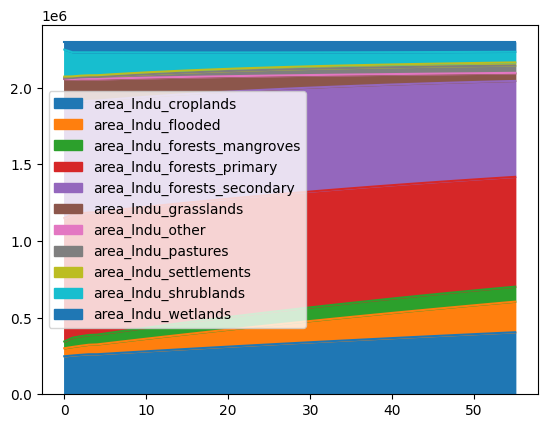

In [85]:
import sisepuede.pipeline.projection_utilities as putil

path = build_path_for_region_file("BLZ")
df_blz = pd.read_csv(path, )

flds = [x for x in df_blz.columns if x.startswith("pij_lndu_")]
field_tp = time_periods.field_time_period
df_adjust = (
    df_blz[[field_tp] + flds]
    .iloc[[0, 2, 3]]
    .copy()
)

df_adjust = (
    pd.merge(
        df_blz[[field_tp]].iloc[0:4],
        df_adjust,
        how = "left",
    )
    .interpolate()
)


df_adjust = putil.repeat_value(
    df_adjust,
    df_blz[field_tp].to_numpy(),
    10,
    "mean",
    field_tp,
    flds,
)


##  REDUCE TRANSITIONS INTO WETLANDS AND SETTLEMENTS 

df_adjust2 = df_adjust.iloc[1:].copy()

dict_factors = {
    "wetlands": 0.9,
    "settlements": 0.9,
    "forests_mangroves": 0.75,
}

attr_lndu = matt.get_attribute_table("Land Use")

for cat_to_exit in dict_factors.keys():

    for k in attr_lndu.key_values:

        if k == cat_to_exit: continue

        # fields
        fld_source = f"pij_lndu_{k}_to_{cat_to_exit}"
        fld_target = f"pij_lndu_{k}_to_{k}"

        # vectors to adjust
        vec_source = df_adjust2[fld_source].to_numpy()
        vec_target = df_adjust2[fld_target].to_numpy()
        
        vec_shift = vec_source*dict_factors.get(cat_to_exit, )
        
        df_adjust2[fld_source] = vec_source - vec_shift
        df_adjust2[fld_target] = vec_target + vec_shift

df_adjust = pd.concat(
    [
        df_adjust.iloc[0:1],
        df_adjust2
    ]
)




##  ADD INTO BLZ TABLE

df_blz = sf.match_df_to_target_df(
    df_blz, 
    df_adjust,
    [
        field_tp
    ],
    overwrite_only = True,
)


# export
if True:
    path_out_blz = path.parents[0].joinpath(path.parts[-1].replace("raw", "adj"))
    sf._write_csv(df_blz, path_out_blz, )

modvar = matt.get_variable("Land Use Area")
df_out = models.model_afolu(df_blz)
modvar.get_from_dataframe(df_out).plot.area()



In [83]:

vec_target


array([0.98687795, 0.98887352, 0.98722908, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573,
       0.98696573, 0.98696573, 0.98696573, 0.98696573, 0.98696573])